# Prediction of House price using Python model

## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
df=pd.read_excel("D:/downlods/DS - Assignment Part 1 data set.xlsx")
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


## Data Exploration

Data exploration is to understand more about data.

In [3]:
df.duplicated().sum()

0

In [4]:
df.shape

(414, 9)

In [5]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

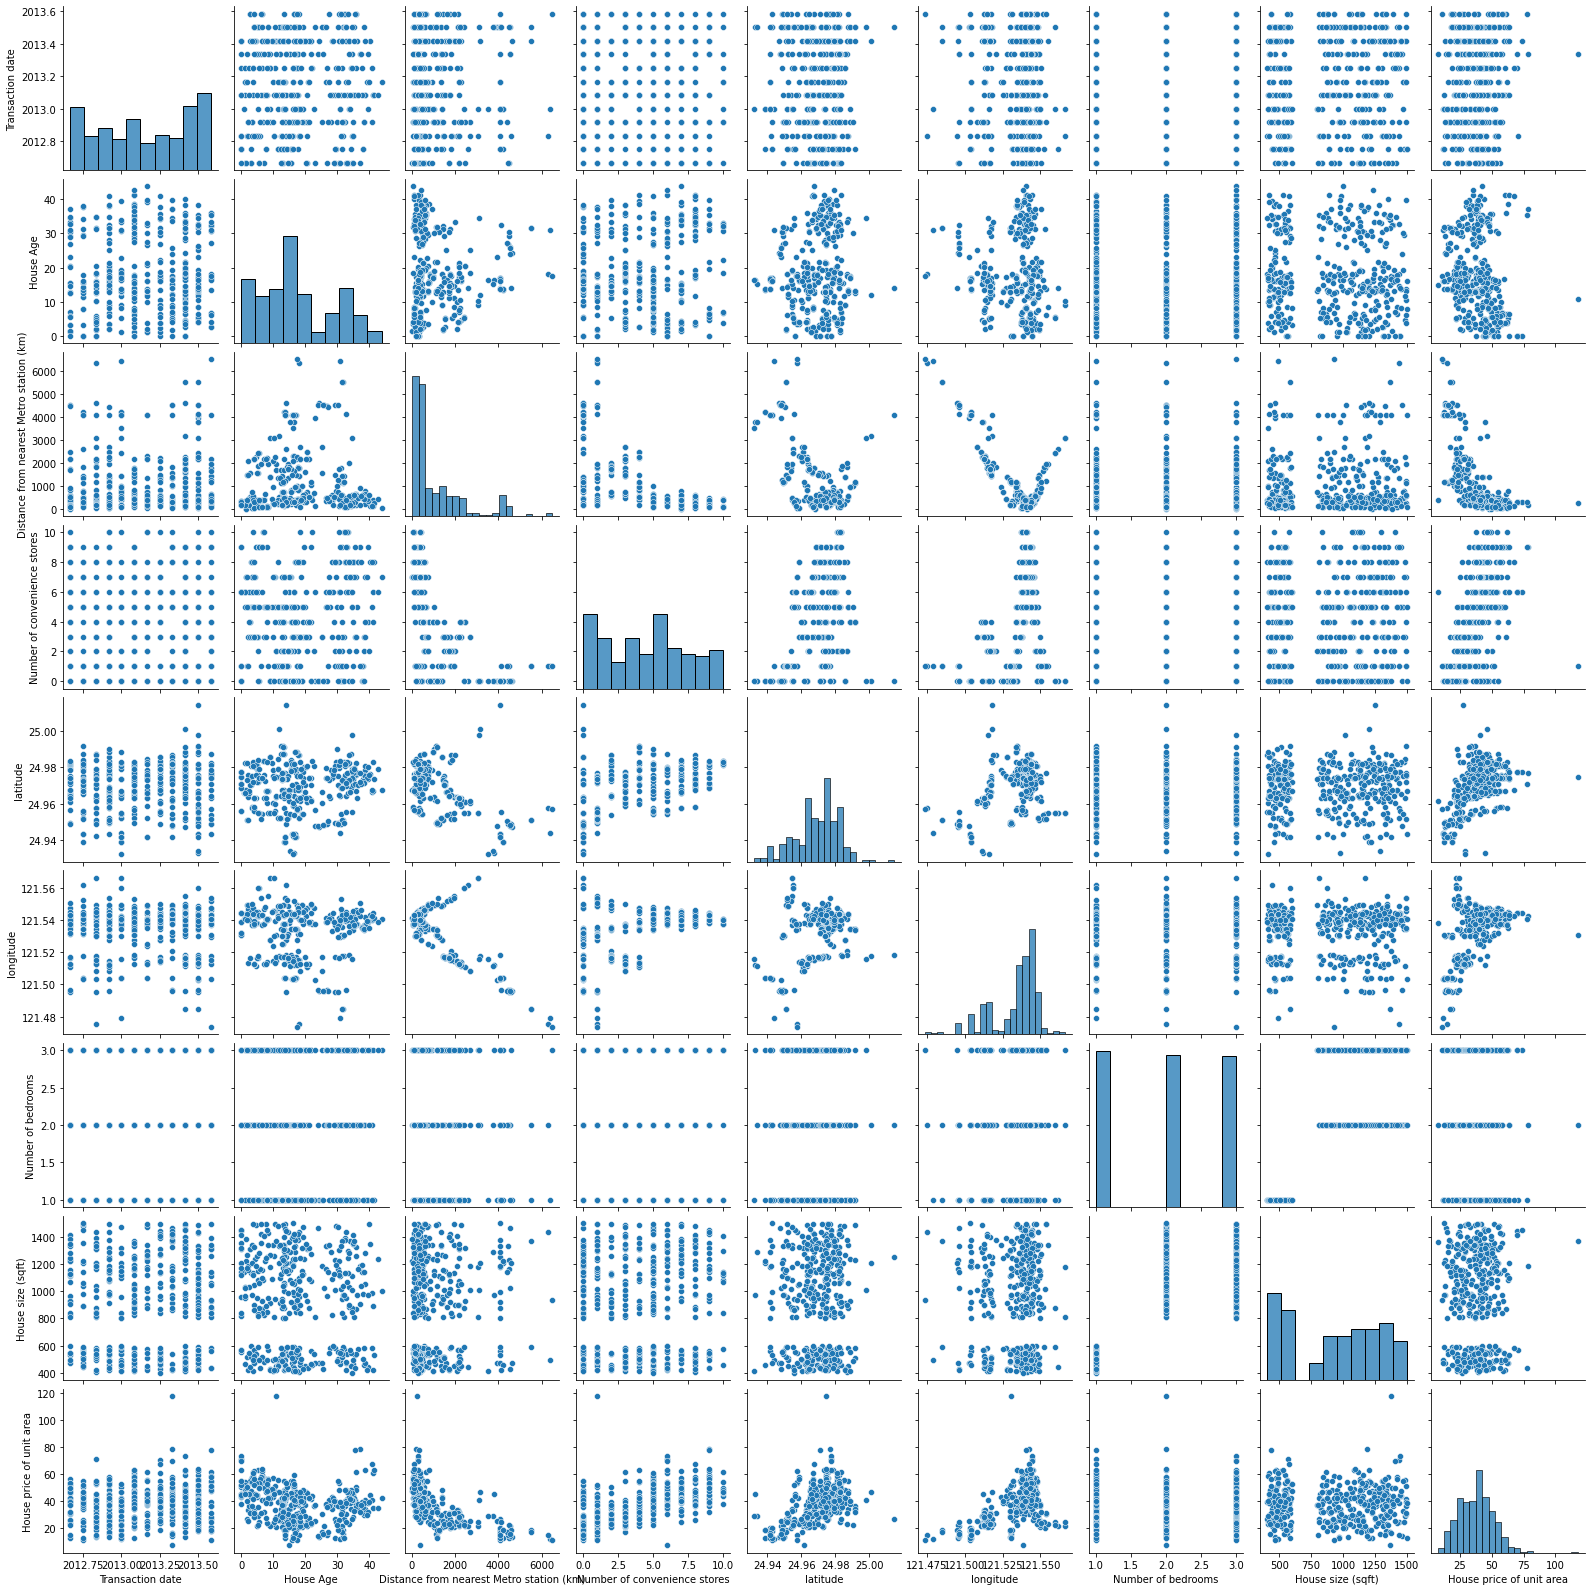

In [6]:
sns.pairplot(df)

<AxesSubplot:xlabel='House price of unit area', ylabel='Count'>

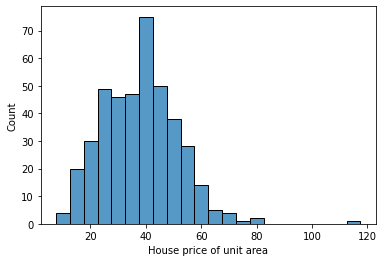

In [7]:
sns.histplot(df["House price of unit area"])

The above graph shows that the house prices are normally Distributed

-

The Correlation helps in finding the relation among all the neumarical values present in the Data.

<AxesSubplot:>

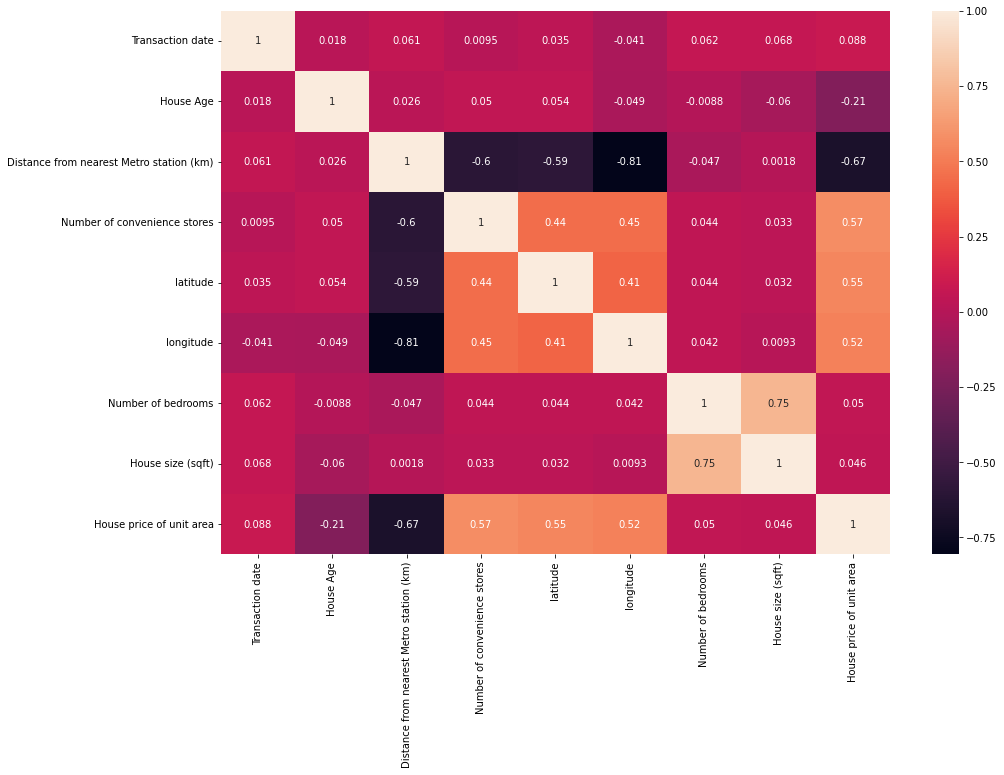

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

# Data preparation

Data preparation involves normalizing the neumarical values, Dummification of categorical values and dividing the whole data into training and testing data.

In [307]:
x=df.iloc[:,1:8]
x.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,32.0,84.87882,10,24.98298,121.54024,1,575
1,19.5,306.59470,9,24.98034,121.53951,2,1240
2,13.3,561.98450,5,24.98746,121.54391,3,1060
3,13.3,561.98450,5,24.98746,121.54391,2,875
4,5.0,390.56840,5,24.97937,121.54245,1,491


In [308]:
y=df["House price of unit area"]
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House price of unit area, dtype: float64

In [309]:
from sklearn.model_selection import train_test_split

In [310]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [311]:
from sklearn.preprocessing import StandardScaler

In [312]:
#Scaling numeric features using sklearn StandardScalar
numeric=["House Age","Distance from nearest Metro station (km)","latitude","longitude","House size (sqft)"]
sc=StandardScaler()
x_train[numeric]=sc.fit_transform(x_train[numeric])
x_test[numeric]=sc.transform(x_test[numeric])

In [313]:
def feature_engineering(df):

    no_of_stores = pd.get_dummies(df['Number of convenience stores'], prefix='no_of_stores')
    df[no_of_stores.columns] = no_of_stores
    df = df.drop('Number of convenience stores', axis=1)

    no_of_bedrooms = pd.get_dummies(df['Number of bedrooms'], prefix='no_of_bedrooms')
    df[no_of_bedrooms.columns] = no_of_bedrooms
    df = df.drop('Number of bedrooms', axis=1)

    return df

In [314]:
x_train=feature_engineering(x_train)
x_test=feature_engineering(x_test)

# Model Building

### For the purpose of predicting of house price Four models (Linear regression, Random forest, Decision tree algorithm, XG Boost) are used.

## Linear Regression

In [315]:
#importing linear regression from sklearn package

from sklearn.linear_model import LinearRegression

In [316]:
lm=LinearRegression()

In [317]:
#fitting the model

lm.fit(x_train,y_train)

LinearRegression()

In [318]:
prediction=lm.predict(x_test)

<AxesSubplot:xlabel='House price of unit area'>

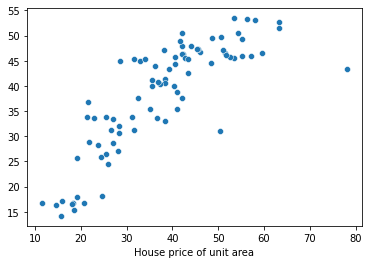

In [319]:
sns.scatterplot(y_test,prediction)

<AxesSubplot:xlabel='House price of unit area', ylabel='Density'>

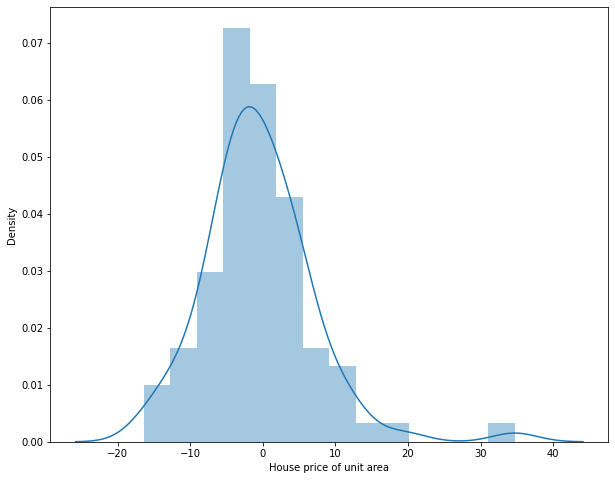

In [320]:
plt.figure(figsize=(10,8))
ax=plt.axes()
ax.set(facecolor="white")
sns.distplot(y_test-prediction)

The values of y_test and prediction values forms a bell shaped curve.

<ErrorbarContainer object of 3 artists>

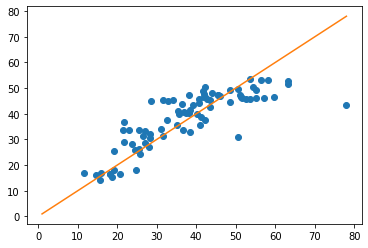

In [321]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(y_test, prediction, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])

The error bar shows how well our model is fitted to our data.

In [322]:
lm.predict([[0.012495,-0.592613,0.486624,-0.136995,-1.018759,0,1,0,0,0,0,0,0,0,0,0,1,0,0]])

array([43.04247242])

In [323]:
from sklearn import metrics

In [324]:
accuracy_lr=metrics.r2_score(y_test, prediction)
print("r2_value =",accuracy_lr)
print("adj_r2: ",1-(1-metrics.r2_score(y_test, prediction))*(len(y_test)-1/(len(y_test)-x_test.shape[1]-1)))
print("MAE: ",metrics.mean_absolute_error(y_test, prediction))
print("MSE: ",metrics.mean_squared_error(y_test, prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, prediction)))

r2_value = 0.6821998973763539
adj_r2:  -25.372364071689237
MAE:  5.505170546004073
MSE:  57.070194597426436
RMSE:  7.554481755714712


#### The r2 value indicates the accuracy of the mode. This linear regression model is going to predict the values( house price ) with 68 % accuracy

# RandomForest method

In [325]:
# importing RandomForestRegressor from sklearn package.

from sklearn.ensemble import RandomForestRegressor

In [326]:
rf = RandomForestRegressor()

In [327]:
#fitting our model to traing datasets.

rf.fit(x_train,y_train)

RandomForestRegressor()

In [328]:
r_prediction = rf.predict(x_test)

<AxesSubplot:xlabel='House price of unit area'>

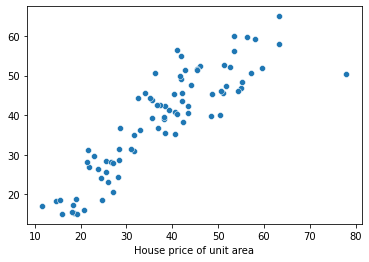

In [329]:
sns.scatterplot(y_test,r_prediction)

<AxesSubplot:xlabel='House price of unit area', ylabel='Density'>

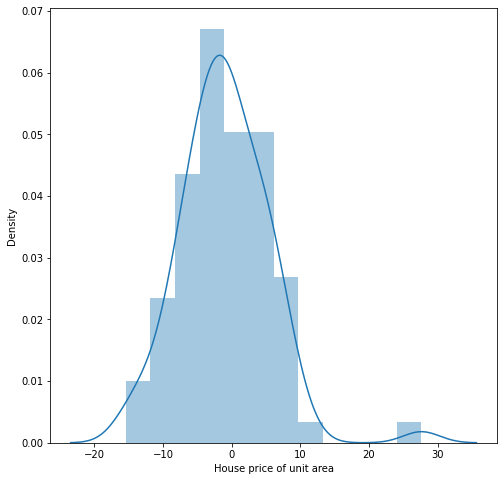

In [330]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-r_prediction)

<ErrorbarContainer object of 3 artists>

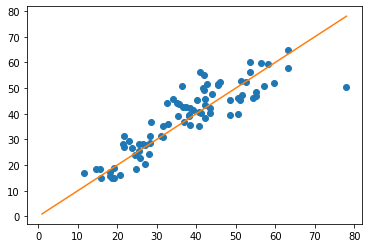

In [331]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(y_test, r_prediction, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])

In [332]:
accuracy_rm=metrics.r2_score(y_test,r_prediction)
print("r2_value =",accuracy_rm)
print("adj_r2: ",1-(1-metrics.r2_score(y_test, r_prediction))*(len(y_test)-1/(len(y_test)-x_test.shape[1]-1)))
print("MAE: ",metrics.mean_absolute_error(y_test, r_prediction))
print("MSE: ",metrics.mean_squared_error(y_test, r_prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, r_prediction)))

r2_value = 0.7649054729589975
adj_r2:  -18.50911408524383
MAE:  4.91096385542169
MSE:  42.218017855421714
RMSE:  6.497539369286016


#### The Random Forest method is going to predict the values of house price with 76 % accuracy.

In [333]:
rf.predict([[0.068420,1.359286,-0.691526,-1.704092,0.227996,0,0,0,1,0,0,0,0,0,0,0,0,1,0]])

array([23.248])

# Decision Tree Algorithm

In [367]:
#importing DecisionTreeRegressor from sklearn.

from sklearn.tree import DecisionTreeRegressor

In [335]:
dt=DecisionTreeRegressor()

In [336]:
#fitting the model.

dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [337]:
d_prediction=dt.predict(x_test)

<AxesSubplot:xlabel='House price of unit area'>

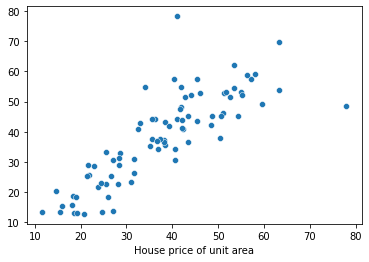

In [338]:
sns.scatterplot(y_test,d_prediction)

<AxesSubplot:xlabel='House price of unit area', ylabel='Density'>

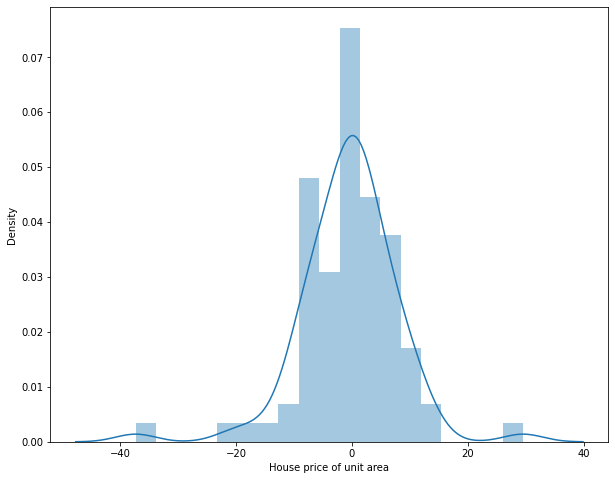

In [339]:
plt.figure(figsize=(10,8))
sns.distplot(y_test-d_prediction)

<ErrorbarContainer object of 3 artists>

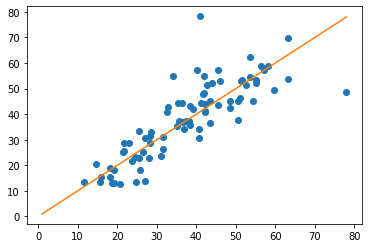

In [340]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(y_test, d_prediction, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])

In [341]:
accuracy_dt=metrics.r2_score(y_test,d_prediction)
print("r2_value =",accuracy_dt)
print("adj_r2: ",1-(1-metrics.r2_score(y_test, d_prediction))*(len(y_test)-1/(len(y_test)-x_test.shape[1]-1)))
print("MAE: ",metrics.mean_absolute_error(y_test, d_prediction))
print("MSE: ",metrics.mean_squared_error(y_test, d_prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, d_prediction)))

r2_value = 0.616757386039184
adj_r2:  -30.803053742653116
MAE:  5.728915662650603
MSE:  68.82228915662651
RMSE:  8.295920030751653


In [342]:
dt.predict([[0.012495,-0.592613,0.486624,-0.136995,-1.018759,0,1,0,0,0,0,0,0,0,0,0,1,0,0]])

array([26.5])

#### The DecisionTreeAlgorithm is going to predict the values of house price with 61 % accuracy.

# XG Boost

In [368]:
# importing xgboost package as xgb.

import xgboost as xgb

In [358]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [359]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [360]:
xg_reg = xgb.XGBRegressor()

In [369]:
#fitting the model

xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [362]:
xg_prediction = xg_reg.predict(x_test)

<AxesSubplot:xlabel='House price of unit area'>

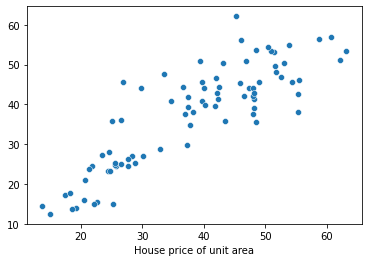

In [363]:
sns.scatterplot(y_test,xg_prediction)

<AxesSubplot:xlabel='House price of unit area', ylabel='Density'>

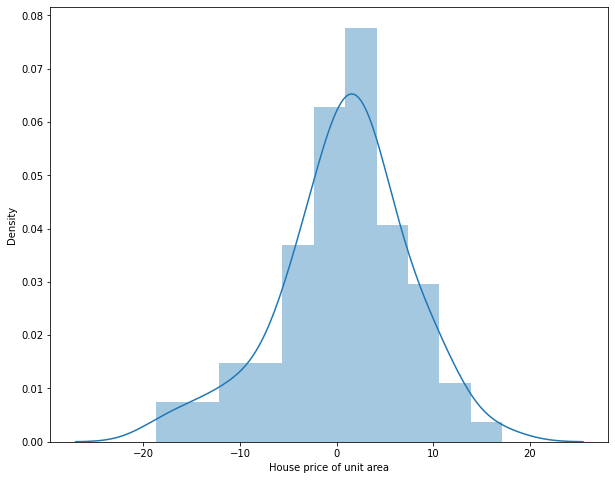

In [364]:
plt.figure(figsize=(10,8))
sns.distplot(y_test-xg_prediction)

<ErrorbarContainer object of 3 artists>

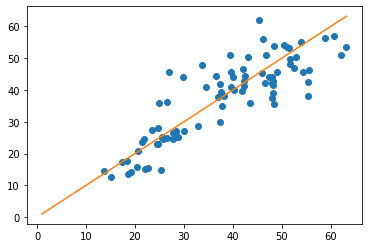

In [365]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(y_test, xg_prediction, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])

In [366]:
accuracy_xg=metrics.r2_score(y_test,xg_prediction)
print("r2_value =",accuracy_xg)
print("adj_r2: ",1-(1-metrics.r2_score(y_test, xg_prediction))*(len(y_test)-1/(len(y_test)-x_test.shape[1]-1)))
print("MAE: ",metrics.mean_absolute_error(y_test, xg_prediction))
print("MSE: ",metrics.mean_squared_error(y_test, xg_prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, xg_prediction)))

r2_value = 0.7164031540866633
adj_r2:  -22.5347569195281
MAE:  5.1330184798642815
MSE:  45.2236827311701
RMSE:  6.724855591845085


#### The XG Boost method is going to predict the values of house price with 71 % accuracy. 

In this Task( Predict the price of a house) the 4 models. i.e., Linear Regression, Random Forest method, DecisionTree Algorithm and XG Boost.

The accuracy of the models are given beliw:

The accuracy of linear regression model is 68 %.

The accuracy of Random Forest method is 76 %.

The accuracy of DecisionTreeAlgorithm is 61 %.

The accuracy of XG Boost method is 71 %.

Based on the predictions made by the above models, The random forest method showed high accuracy.

AND
  
   I conclude that the RandomForest method is the best method for prediction and the XG Boost is in Second.